In [ ]:
Andre Londono

# Workshop 7: Introduction to Linear Regression

*Source: http://www.dataschool.io/linear-regression-in-python/*

*Adapted from Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)*

## Motivation

Why are we learning linear regression?
- widely used
- runs fast
- easy to use (not a lot of tuning required)
- highly interpretable
- basis for many other methods

## Libraries

Will be using [Statsmodels](http://statsmodels.sourceforge.net/) for **teaching purposes** since it has some nice characteristics for linear modeling. There is a more powerful package: [scikit-learn](http://scikit-learn.org/stable/) which provides significantly more useful functionality for machine learning in general. We will use it in a few weeks when we discuss machine learning, neural nets, etc. 

## Installation

Make sure that pandas, statsmodel, and scikit-learn are installed. Go to Canopy's Package Manager, and select the following packages for installation:

- pandas (current version 0.18.0)
- pandas_datareader (current version 0.2.1)
- scikits.learn (current version is 0.8) 
- scikits.statsmodels (current version is 0.3.1)
- statsmodels (current version 0.6.1)

Please see links at the end of this notebook for tutorial pages for specific tools used here (e.g. Pandas, Statsmodels, SciKits-learn). Some of these tools may be useful to you in your Capstone Project, or in your own research. We will leave them to you for the end of today's workshop. Pandas in particular is a useful tool for doing data analyses in Python. See documentation at 

http://pandas.pydata.org/pandas-docs/stable/

In [7]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

## Example: Advertising Data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [8]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [9]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 **observations**, and thus 200 markets in the dataset.

### Exercise 1

Practice reading spreadsheets with Pandas:
1. Download the file http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv , save it on your local machine, read the local file into Pandas dataframe 
1. Open Advertising.csv with your favorite spreadsheet program (Excel or equivalent), convert it to Excel, read the excel file into Pandas dataframe. See documentation at 
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


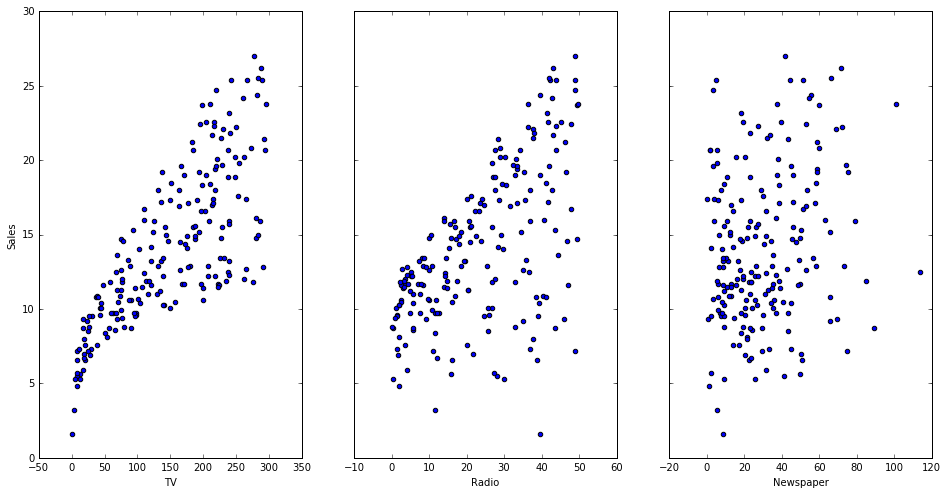

In [10]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

## Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

Let's use **Statsmodels** to estimate the model coefficients for the advertising data:

In [20]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

## Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [21]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, we would predict Sales of **9,409 widgets** in that market.

Of course, we can also use Statsmodels to make the prediction:

In [22]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [15]:
# use the model to make predictions on a new value
lm.predict(X_new)

NameError: name 'lm' is not defined

## Plotting the Least Squares Line

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

In [24]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [25]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([ 9.40942557])

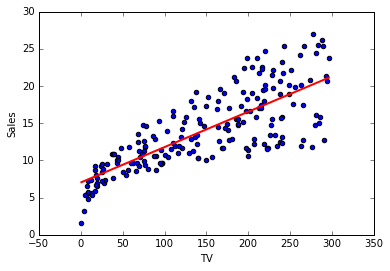

In [26]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

### Exercise 2

As we pointed out in lecture, the linear regression is not really valid for this dataset over all values of "TV". In particular, there is a clear deviation from the linear dependence for small values of TV. Therefore, if you use the fit over the entire range of TV values, the fit is biased. Perform alternative fit:
1. Fit the response (Sales) against the feature (TV) for TV > 20. Make a plot of Saves vs TV with the new fit line and the old fit line superimposed. 
1. Fit the response (Sales) against the feature (TV) for TV < 20. Make a plot of Saves vs TV with the new fit line and the old fit line superimposed. Is the intercept consistent with zero ? What does this mean ? 

Hint: you can write a loop, or use list comprehension, but it would be better to do data selection natively. See how to select data in Pandas at http://pandas.pydata.org/pandas-docs/stable/cookbook.html

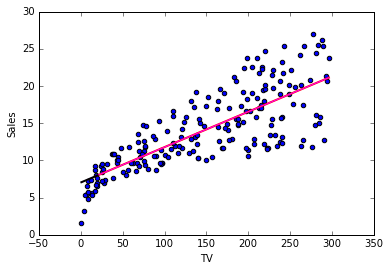

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline
#1
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

X_old = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new = pd.DataFrame({'TV': [20,data.TV.max()]})
X_new.head()
X_old.head()
preds = lm.predict(X_new)
predsOld = lm.predict(X_old)


# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)
plt.plot(X_old, predsOld, c = 'magenta', linewidth = 1)

#2
X_mid = pd.DataFrame({'TV': [data.TV.min(), 20]})
X_mid.head()
predsMid = lm.predict(X_mid)

plt.plot(X_mid, predsMid, c = 'black', linewidth = 2)

plt.show()


### Exercise 3

Regress response (Sales) against two other features (Radio, Newspaper) using a 1d fit. Make two plots: 
1. Scatter plot of Sales vs Radio with the fit line superimposed. Do you see a strong trend ? 
1. Scatter plot of Sales vs Newspaper with the fit line superimposed. Do you see a strong trend ? 

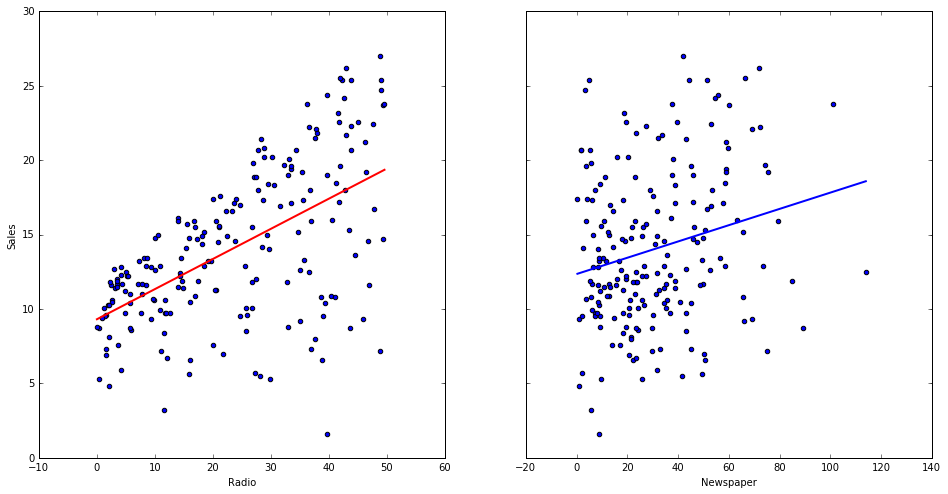

In both cases there is so much scattering that I dont see a specific trend because you could draw infinite many lines between this many points


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline
#1



lm = smf.ols(formula='Sales ~ Radio', data=data).fit()

X_old = pd.DataFrame({'Radio': [data.Radio.min(), data.Radio.max()]})
X_old.head()
predsOld = lm.predict(X_old)

fig, axs = plt.subplots(1, 2, sharey=True)
axs[0].plot(X_old, predsOld, c='red', linewidth=2)


#2
lm = smf.ols(formula = 'Sales ~ Newspaper', data = data).fit()
X2 = pd.DataFrame({'Newspaper': [data.Newspaper.min(), data.Newspaper.max()]})
preds2 = lm.predict(X2)
axs[1].plot(X2, preds2, c = 'blue', linewidth = 2)

data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[0], figsize = (16,8))
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[1])


plt.show()

print "In both cases there is so much scattering that I dont see a specific trend because you could draw infinite many lines between this many points"


## Confidence in our Model

**Question:** Is linear regression a high bias/low variance model, or a low bias/high variance model?

**Answer:** High bias/low variance. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). Note that low variance is a useful characteristic when you don't have a lot of training data!

A closely related concept is **confidence intervals**. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

In [13]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

## Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [14]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

In [43]:
# create a fitted model with all three features
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** is associated with an **increase in Sales of 45.765 widgets**.

A lot of the information we have been reviewing piece-by-piece is available in the model summary output:

In [44]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 01 Apr 2016   Prob (F-statistic):           1.58e-96
Time:                        09:37:59   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things we learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

### Exercise 4

Make 3 scatter plots: Sales vs TV, Sales vs Radio, Sales vs Newspaper. Superimpose fit lines on each plot. Here you need to be a little careful. When you plot Sales vs TV, the values of Radio are not zero -- you are averaging over them. Figure out how to use this fact when you plot the fit lines. 

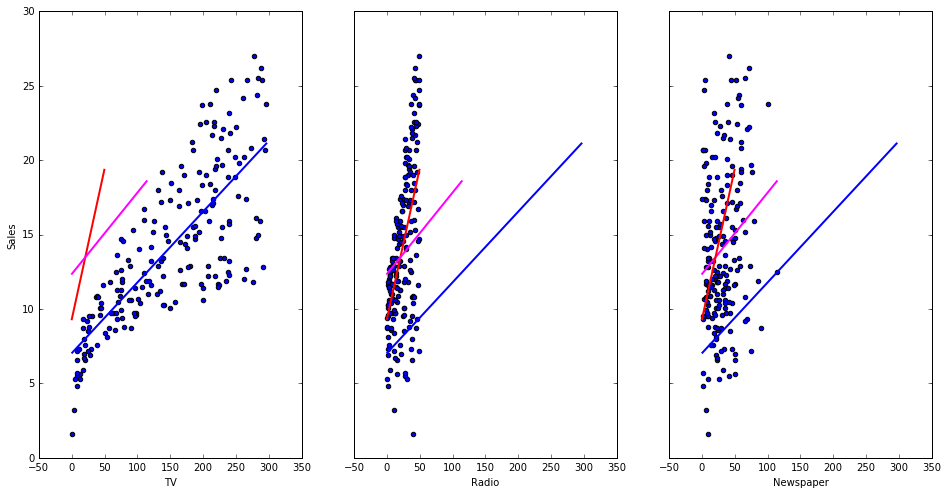

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


%matplotlib inline
#1
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()
predsnew = lm.predict(X_new)

lm = smf.ols(formula='Sales ~ Radio', data=data).fit()

X_old = pd.DataFrame({'Radio': [data.Radio.min(), data.Radio.max()]})
X_old.head()
predsOld = lm.predict(X_old)


lm = smf.ols(formula = 'Sales ~ Newspaper', data = data).fit()
X2 = pd.DataFrame({'Newspaper': [data.Newspaper.min(), data.Newspaper.max()]})
preds2 = lm.predict(X2)

fig, axs = plt.subplots(1, 3, sharey=True)
axs[1].plot(X_old, predsOld, c='red', linewidth=2)
axs[1].plot(X_new, predsnew, c='blue', linewidth=2)
axs[1].plot(X2, preds2, c = 'Magenta', linewidth = 2)

axs[0].plot(X_new, predsnew, c='blue', linewidth=2)
axs[0].plot(X_old, predsOld, c='red', linewidth=2)
axs[0].plot(X2, preds2, c = 'Magenta', linewidth = 2)

axs[2].plot(X2, preds2, c = 'Magenta', linewidth = 2)
axs[2].plot(X_old, predsOld, c='red', linewidth=2)
axs[2].plot(X_new, predsnew, c='blue', linewidth=2)

data.plot(kind='scatter', x='TV', y='Sales', ax = axs[0],  figsize = (16,8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])


plt.show()

### Exercise 5 (optional)

There is another way to do the multi-dimensional regression. Try the following:

1. Regress Sales against TV (as in the original example). Record the slope $\beta_T$ and intercept $\beta_{0T}$. 
1. Compute the residuals for each data point, i.e. $\Delta y$ = Sales - $\beta_{0T} - \beta_T * TV$
1. Now regress $\Delta y$ against Radio. Record slope $\beta_R$ and new intercept $\beta_{0R}$
1. Compute new residuals for each data point, i.e. $\Delta y'$ = $\Delta Y$ - $\beta_{0R} - \beta_R * Radio$
1. Regress $\Delta y'$ against Newspaper. Record slope $\beta_N$ and new intercept $\beta_{0N}$
1. Compare values of $\beta_T$, $\beta_R$, and $\beta_N$ to slopes you got in the multi-dimensional regression.
1. Compare sum $\beta_{0T}+\beta_{0R}+\beta_{0N}$ to the intercept got in the multi-dimensional regression. Which method of multi-dimensional regression better ?

## Optional:

### General-purpose regression with StatsModels

There is a more direct way to use StatsModels tool for regression (i.e. without the use of formulae):

In [75]:
import statsmodels.api as sm
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
X = sm.add_constant(X)   # regress against constant to compute the intercept
y = data.Sales
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 01 Apr 2016   Prob (F-statistic):           1.58e-96
Time:                        11:43:29   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

results object can be queried to obtain more information (see dir(results) for details). E.g.:

In [67]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)
print 'Covariance matrix:'
print(results.cov_params())

('Parameters: ', const        2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64)
('R2: ', 0.89721063817895208)
Covariance matrix:
              const            TV         Radio     Newspaper
const      0.097287 -2.657273e-04 -1.115489e-03 -5.910212e-04
TV        -0.000266  1.945737e-06 -4.470395e-07 -3.265950e-07
Radio     -0.001115 -4.470395e-07  7.415335e-05 -1.780062e-05
Newspaper -0.000591 -3.265950e-07 -1.780062e-05  3.446875e-05


## Feature Selection

How do I decide **which features to include** in a linear model? Here are some methods:
- Look at correlation between predictors, and remove highly correlated (>90-95%) predictors. High correlations make inverting the predictor covariance matrix difficult, which can lead to problems with regression results 
- Try different models, and only keep predictors in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new predictors.
- Check whether the F-statistic goes up

What are the **drawbacks** to this approach?
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 predictors to a model that are **pure noise**, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [45]:
# only include TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared

0.89719426108289557

In [46]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper + TV', data=data).fit()
lm.rsquared

0.89721063817895219

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

So is there a better approach to feature selection? **Cross-validation.** It provides a more reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.

## Linear Regression in scikit-learn

Let's redo some of the Statsmodels code above in scikit-learn:

In [47]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from scikits.learn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print lm.intercept_
print lm.coef_

2.93888936946
[ 0.04576465  0.18853002 -0.00103749]


In [48]:
# pair the feature names with the coefficients
zip(feature_cols, lm.coef_)

[('TV', 0.045764645455397622),
 ('Radio', 0.18853001691820465),
 ('Newspaper', -0.001037493042476251)]

In [49]:
# predict for a new observation
lm.predict([100, 25, 25])

12.202667011892371

In [50]:
# calculate the R-squared
lm.score(X, y)

0.89721063817895219

Note that **p-values** and **confidence intervals** are not (easily) accessible through scikit-learn.

## Handling Categorical Predictors with Two Categories

Up to now, all of our predictors have been numeric. What if one of our predictors was categorical?

Let's create a new feature called **Size**, and randomly assign observations to be **small or large**:

In [24]:
import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


For scikit-learn, we need to represent all data **numerically**. If the feature only has two categories, we can simply create a **dummy variable** that represents the categories as a binary value:

In [25]:
# create a new Series called IsLarge
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


Let's redo the multiple linear regression and include the **IsLarge** predictor:

In [26]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
zip(feature_cols, lm.coef_)

[('TV', 0.045719820924362782),
 ('Radio', 0.18872814313427883),
 ('Newspaper', -0.0010976794483516423),
 ('IsLarge', 0.057423850854827797)]

How do we interpret the **IsLarge coefficient**? For a given amount of TV/Radio/Newspaper ad spending, being a large market is associated with an average **increase** in Sales of 57.42 widgets (as compared to a Small market, which is called the **baseline level**).

What if we had reversed the 0/1 coding and created the feature 'IsSmall' instead? The coefficient would be the same, except it would be **negative instead of positive**. As such, your choice of category for the baseline does not matter, all that changes is your **interpretation** of the coefficient.

## Handling Categorical Predictors with More than Two Categories

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban**:

In [27]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


We have to represent Area numerically, but we can't simply code it as 0=rural, 1=suburban, 2=urban because that would imply an **ordered relationship** between suburban and urban (and thus urban is somehow "twice" the suburban category).

Instead, we create **another dummy variable**:

In [28]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0.0,0.0
2,44.5,39.3,45.1,10.4,small,0,urban,0.0,1.0
3,17.2,45.9,69.3,9.3,small,0,rural,0.0,0.0
4,151.5,41.3,58.5,18.5,small,0,urban,0.0,1.0
5,180.8,10.8,58.4,12.9,large,1,suburban,1.0,0.0


Here is how we interpret the coding:
- **rural** is coded as Area_suburban=0 and Area_urban=0
- **suburban** is coded as Area_suburban=1 and Area_urban=0
- **urban** is coded as Area_suburban=0 and Area_urban=1

Why do we only need **two dummy variables, not three?** Because two dummies captures all of the information about the Area feature, and implicitly defines rural as the baseline level. (In general, if you have a categorical feature with k levels, you create k-1 dummy variables.)

If this is confusing, think about why we only needed one dummy variable for Size (IsLarge), not two dummy variables (IsSmall and IsLarge).

Let's include the two new dummy variables in the model:

In [29]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
zip(feature_cols, lm.coef_)

[('TV', 0.045744010363313749),
 ('Radio', 0.18786669552525823),
 ('Newspaper', -0.0010876977267107821),
 ('IsLarge', 0.077396607497479217),
 ('Area_suburban', -0.10656299015958624),
 ('Area_urban', 0.26813802165220074)]

How do we interpret the coefficients?
- Holding all other variables fixed, being a **suburban** area is associated with an average **decrease** in Sales of 106.56 widgets (as compared to the baseline level, which is rural).
- Being an **urban** area is associated with an average **increase** in Sales of 268.13 widgets (as compared to rural).

**A final note about dummy encoding:** If you have categories that can be ranked (i.e., strongly disagree, disagree, neutral, agree, strongly agree), you can potentially use a single dummy variable and represent the categories numerically (such as 1, 2, 3, 4, 5).

### Regressing against a highly correlated parameters

We can create a fake dataset with highly correlated parameters, e.g. by copying a column. Let's see what happens. Pay attention to the last line of the output !

In [76]:
import statsmodels.api as sm
data['TV2'] = data['TV']   # copy a column
feature_cols = ['TV', 'Radio', 'Newspaper','TV2']
X = data[feature_cols]
X = sm.add_constant(X)   # regress against constant to compute the intercept
y = data.Sales
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 01 Apr 2016   Prob (F-statistic):           1.58e-96
Time:                        11:46:52   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

#### Now let's see what happens in scikit-learn:

In [82]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper','TV2']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from scikits.learn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print 'R2=',lm.score(X, y)
print 'Intercept=',lm.intercept_
zip(feature_cols, lm.coef_)

R2= 0.894790111183
Intercept= 3.3975


[('TV', -2542124757045.1821),
 ('Radio', 0.18870669548651642),
 ('Newspaper', -0.0016023590672754055),
 ('TV2', 2542124757045.2251)]

## What Didn't We Cover?

- Detecting collinearity
- Diagnosing model fit
- Transforming predictors to fit non-linear relationships
- Interaction terms
- Assumptions of linear regression
- And so much more!

You could certainly go very deep into linear regression, and learn how to apply it really, really well. It's an excellent way to **start your modeling process** when working a regression problem. However, it is limited by the fact that it can only make good predictions if there is a **linear relationship** between the features and the response, which is why more complex methods (with higher variance and lower bias) will often outperform linear regression.

Therefore, we want you to understand linear regression conceptually, understand its strengths and weaknesses, be familiar with the terminology, and know how to apply it. However, we also want to spend time on many other machine learning models, which is why we aren't going deeper here.

## Resources

- Tutotials and examples for specific data analysis tools:
    - Pandas: http://pandas.pydata.org/pandas-docs/stable/tutorials.html
    - Statsmodels: http://statsmodels.sourceforge.net/devel/examples/index.html
    - Scikit-learn: http://scikit-learn.org/stable/tutorial/

- To go much more in-depth on linear regression, read Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/), from which this lesson was adapted. Alternatively, watch the [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) or read the [quick reference guide](http://www.dataschool.io/applying-and-interpreting-linear-regression/) to the key points in that chapter.
- To learn more about Statsmodels and how to interpret the output, DataRobot has some decent posts on [simple linear regression](http://www.datarobot.com/blog/ordinary-least-squares-in-python/) and [multiple linear regression](http://www.datarobot.com/blog/multiple-regression-using-statsmodels/).
- This [introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) is much more detailed and mathematically thorough, and includes lots of good advice.
- This is a relatively quick post on the [assumptions of linear regression](http://pareonline.net/getvn.asp?n=2&v=8).